# PRODIGY_DS_04

## Anaylzing and visualizing sentiment data for a group of airline companies. The sentiments were scraped from Twitter

[Kaggle_data_source](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/data)


In [61]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# reading in the csv file
df = pd.read_csv("/Users/mostaphaatta/Downloads/archive/Tweets.csv")

### Exploratory Data Analysis

In [63]:
df.shape

(14640, 15)

In [64]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

> Now we don't need all of these columns, we're going to filter out some of them

### Data preprocessing

In [66]:
# Filtering df
trash = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason_confidence',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']
df = df.drop(trash, axis = 'columns')

In [67]:
df.columns

Index(['airline_sentiment', 'negativereason', 'airline', 'text'], dtype='object')

In [68]:
# Creating a df including positive sentiments only
pos_sent = df[df['airline_sentiment'] == 'positive']

In [69]:
pos_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 1 to 14635
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  2363 non-null   object
 1   negativereason     0 non-null      object
 2   airline            2363 non-null   object
 3   text               2363 non-null   object
dtypes: object(4)
memory usage: 92.3+ KB


### Plotting
* * *
__We will be plotting three graphs__:

1. comparing between the number of positive sentiments for each airline
2. displaying the positive sentiments as a share of the total sentiment  
    (normalized to total sentiments of said airline)
3. The ranking of negative reasons for each airline

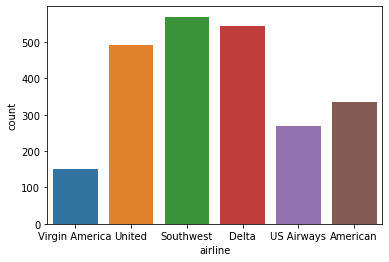

In [70]:
ax = sns.countplot(x = 'airline', data = pos_sent)

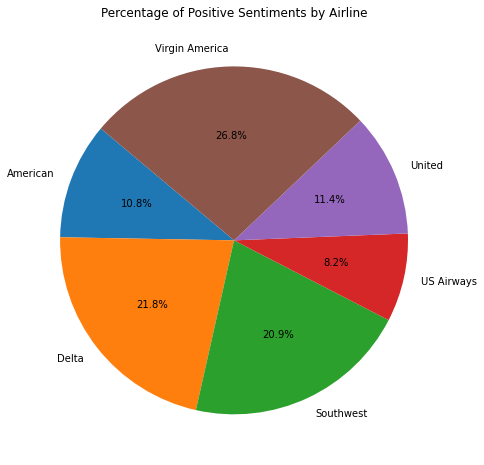

In [71]:
# 1. Count the total sentiments for each airline
total_sentiments = df.groupby('airline')['airline_sentiment'].count()

# 2. Count the positive sentiments for each airline
positive_sentiments = df[df['airline_sentiment'] == 'positive'].groupby('airline')['airline_sentiment'].count()

# 3. Calculate the percentage of positive sentiments
percentage_positive = (positive_sentiments / total_sentiments) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentage_positive, labels=percentage_positive.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Positive Sentiments by Airline')
plt.show()

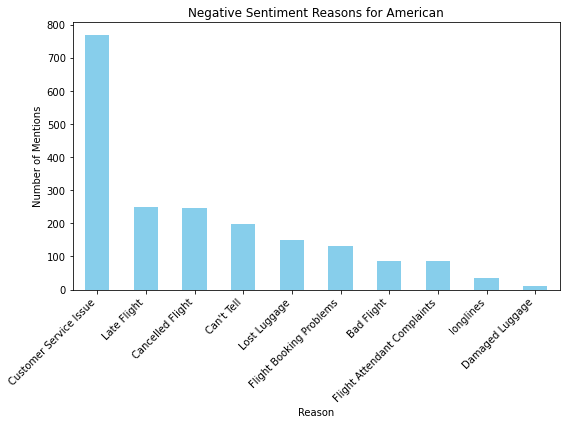

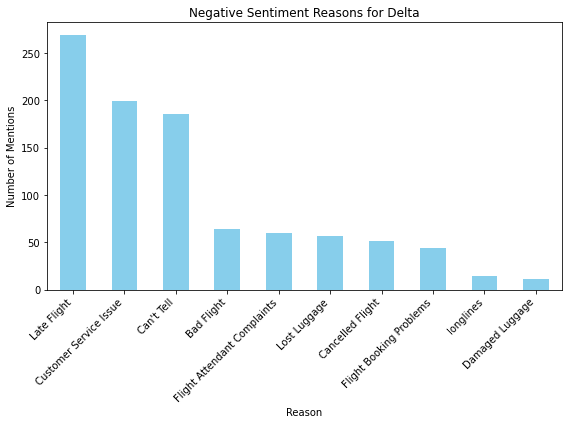

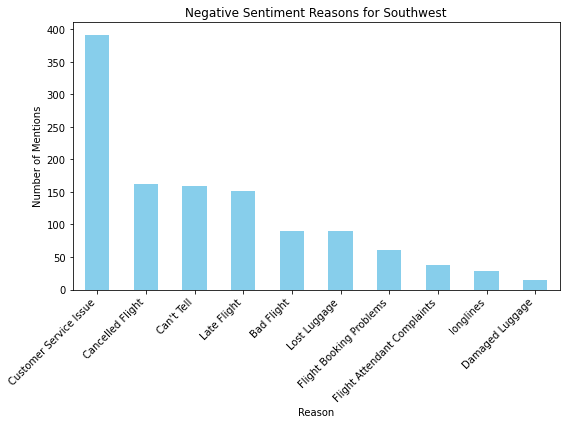

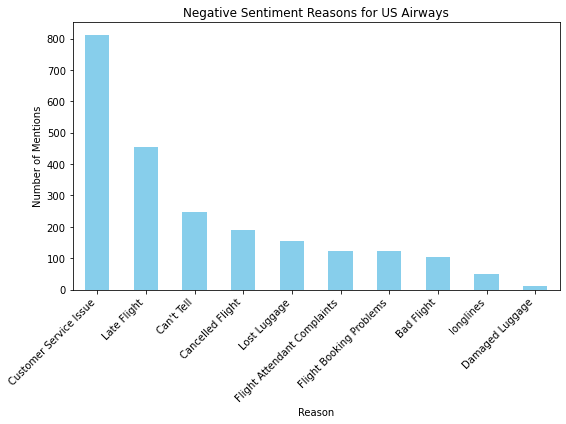

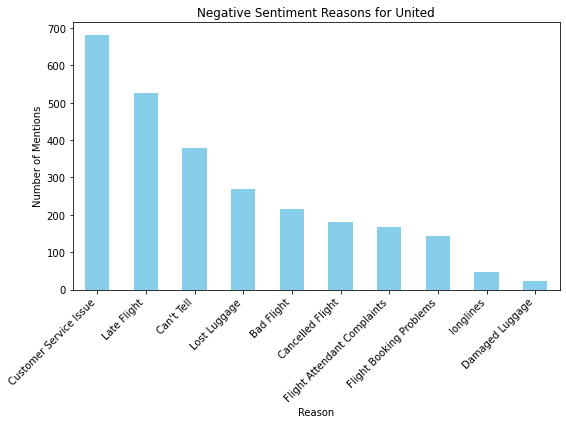

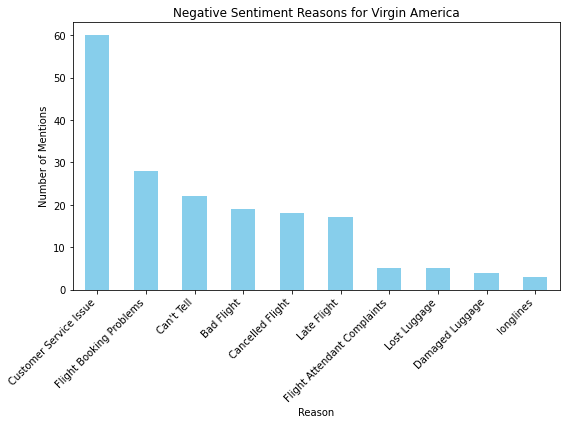

In [72]:
# 1. Filter the DataFrame for negative sentiments
negative_df = df[df['airline_sentiment'] == 'negative']

# 2. Count the reasons for each airline
reason_counts = negative_df.groupby(['airline', 'negativereason']).size().unstack(fill_value=0)

# 3. Sort the counts for each airline from most to least
reason_counts_sorted = reason_counts.apply(lambda x: x.sort_values(ascending=False), axis=1)

# 4. Plot each airline's data in a separate graph
for airline in reason_counts.index:
    # Sort the counts in descending order before plotting
    sorted_counts = reason_counts.loc[airline].sort_values(ascending=False)
    
    plt.figure(figsize=(8, 6))
    sorted_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Negative Sentiment Reasons for {airline}')
    plt.xlabel('Reason')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()